In [8]:
from google.colab import drive

In [3]:
import pandas as pd

In [4]:
import numpy as np

In [5]:
import matplotlib.pyplot as plt

In [6]:
import seaborn as sns

In [50]:
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/employe.csv'
data = pd.read_csv(file_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [51]:
print(data)

    employee_id             name  age department gender    salary  \
0             1      Jean Sannon   34  Marketing      M  55000.00   
1             2     Marie Dubois   29    Finance      F  60000.89   
2             3       Paul Pogba   45         HR      M  65000.00   
3             4   Sophie Bernard   38         IT      F  70000.00   
4             5       Lub Durand   31      Sales      M  52000.00   
5             6     Emma Beyonce   26  Marketing      F  48000.24   
6             7     Lucas Moreau   40    Finance      M  62000.00   
7             8      Chloe Simon   33         HR      F  58000.00   
8             9     Julien Attie   28         IT      M  74000.00   
9            10   Alice Rousseau   37      Sales      F  53000.30   
10           11     Martin Leroy   50  Marketing      M  69000.00   
11           12  Elise Lamissere   24    Finance      F  47000.39   
12           13      Noah Girard   32         HR      M  60000.00   
13           14        Lea Roger  

In [52]:
# map mete NaN nan champs ki pa gen vale yo
data['education_level'].fillna('NaN', inplace=True)
data['etat_civil'].fillna('NaN', inplace=True)
data['enfants'].fillna('NaN', inplace=True)
data['job_satisfaction'].fillna('NaN', inplace=True)

In [53]:
# Map mete salaire yo en valeur numerique
data['salary'] = data['salary'].astype(float)

In [54]:
print(data)

    employee_id             name  age department gender    salary  \
0             1      Jean Sannon   34  Marketing      M  55000.00   
1             2     Marie Dubois   29    Finance      F  60000.89   
2             3       Paul Pogba   45         HR      M  65000.00   
3             4   Sophie Bernard   38         IT      F  70000.00   
4             5       Lub Durand   31      Sales      M  52000.00   
5             6     Emma Beyonce   26  Marketing      F  48000.24   
6             7     Lucas Moreau   40    Finance      M  62000.00   
7             8      Chloe Simon   33         HR      F  58000.00   
8             9     Julien Attie   28         IT      M  74000.00   
9            10   Alice Rousseau   37      Sales      F  53000.30   
10           11     Martin Leroy   50  Marketing      M  69000.00   
11           12  Elise Lamissere   24    Finance      F  47000.39   
12           13      Noah Girard   32         HR      M  60000.00   
13           14        Lea Roger  

In [55]:
# mete colonne yo en type category poum k pi byen manipule yo
data['gender'] = data['gender'].astype('category')
data['department'] = data['department'].astype('category')
data['education_level'] = data['education_level'].astype('category')
data['etat_civil'] = data['etat_civil'].astype('category')
data['groupe_sanguin'] = data['groupe_sanguin'].astype('category')

In [56]:
# calcule anne nou ye an
annee_present = pd.Timestamp.now().year
print(annee_present)

2024


In [57]:
# calcule date denye promotion employe anh
data['temps_denye_promotion'] = annee_present - data['last_promotion']
print(data['temps_denye_promotion'])

0     3
1     4
2     6
3     2
4     1
5     1
6     5
7     4
8     3
9     2
10    7
11    1
12    3
13    1
14    5
15    1
16    4
17    2
18    3
19    4
20    1
21    5
22    3
23    2
24    1
Name: temps_denye_promotion, dtype: int64


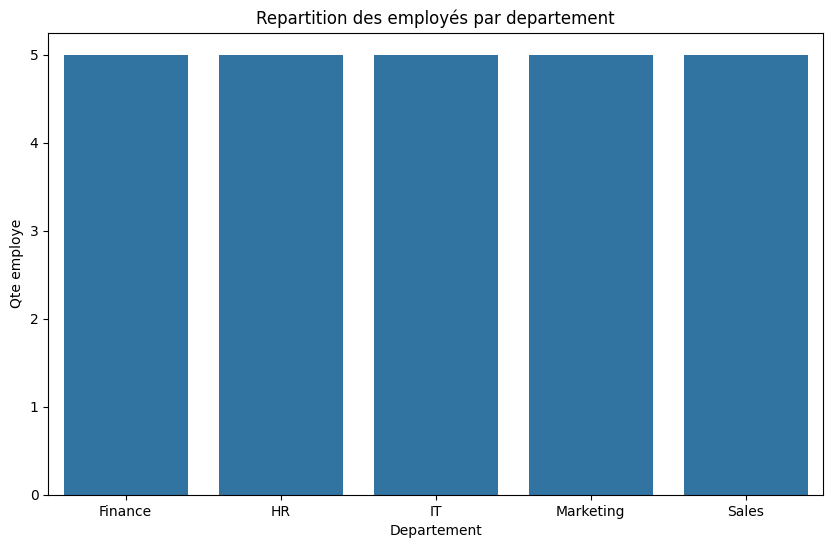

In [58]:
# Répartition employe par département yap travay lan
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='department')
plt.title('Repartition des employés par departement')
plt.xlabel('Departement')
plt.ylabel('Qte employe')
plt.show()

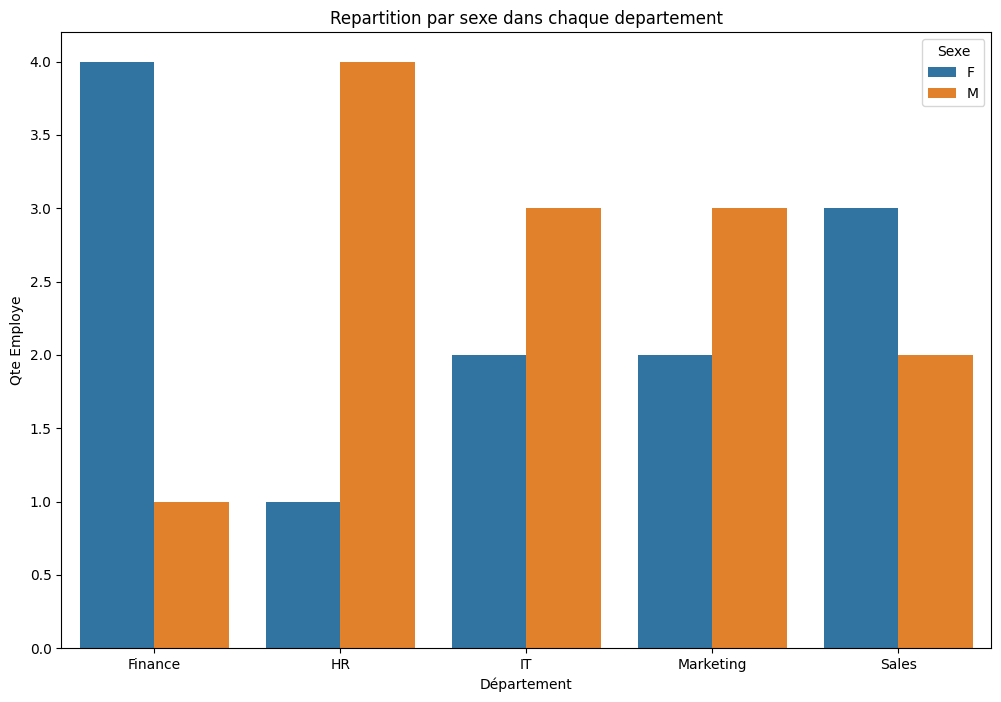

In [59]:
# Quantite employe par sexe yo nan chak departement
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='department', hue='gender')
plt.title('Repartition par sexe dans chaque departement')
plt.xlabel('Département')
plt.ylabel('Qte Employe')
plt.legend(title='Sexe')
plt.show()

In [26]:
# age moyenne par departement
ageMoyenne = data.groupby('department')['age'].mean().reset_index()
print(ageMoyenne)

  department        age
0    Finance  31.000000
1         HR  35.000000
2         IT  31.000000
3  Marketing  36.666667
4      Sales  32.750000


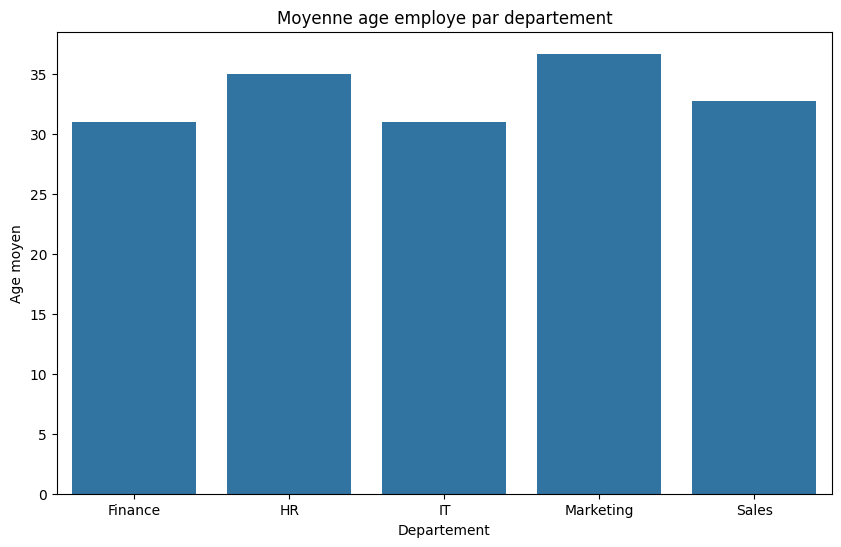

In [60]:
# graphe
plt.figure(figsize=(10, 6))
sns.barplot(data=ageMoyenne, x='department', y='age')
plt.title('Moyenne age employe par departement')
plt.xlabel('Departement')
plt.ylabel('Age moyen')
plt.show()

In [28]:
# moyenne Salaire
salaireMoyenne = data.groupby('department')['salary'].mean().reset_index()
print(salaireMoyenne)

  department        salary
0    Finance  56333.760000
1         HR  60500.000000
2         IT  73000.000000
3  Marketing  57333.413333
4      Sales  52750.075000


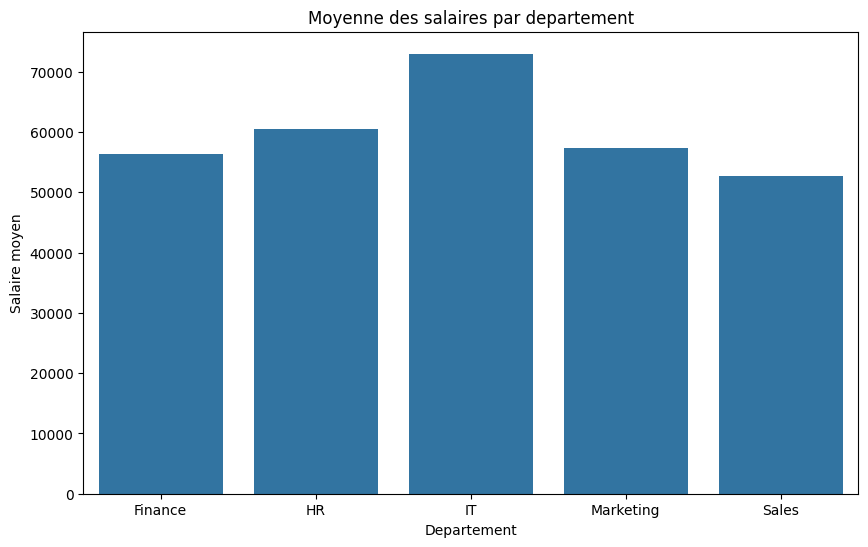

In [61]:
# graphe
plt.figure(figsize=(10, 6))
sns.barplot(data=salaireMoyenne, x='department', y='salary')
plt.title('Moyenne des salaires par departement')
plt.xlabel('Departement')
plt.ylabel('Salaire moyen')
plt.show()

In [63]:
# Satisfaction par departement
satisfaction = data.groupby('department')['job_satisfaction'].mean().reset_index()
print(satisfaction)

  department  job_satisfaction
0    Finance               7.2
1         HR               6.4
2         IT               8.4
3  Marketing               7.4
4      Sales               6.8


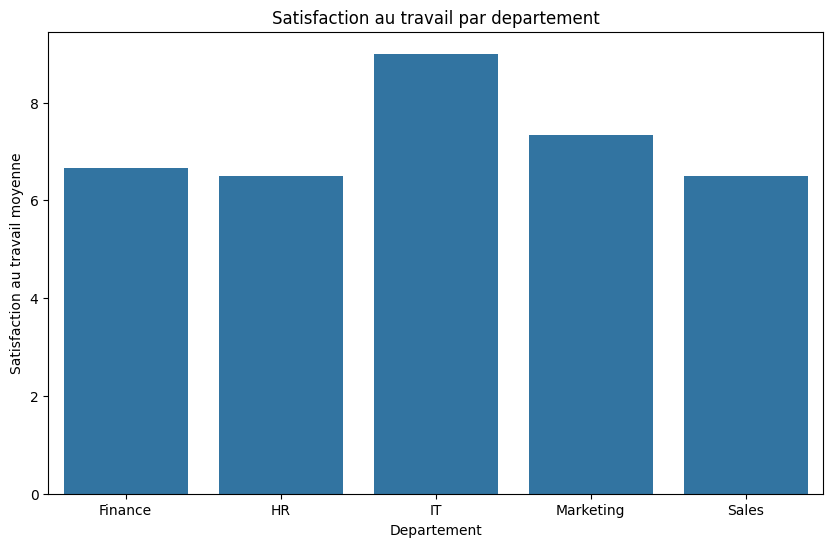

In [62]:
# Graphe
plt.figure(figsize=(10, 6))
sns.barplot(data=satisfaction, x='department', y='job_satisfaction')
plt.title('Satisfaction au travail par departement')
plt.xlabel('Departement')
plt.ylabel('Satisfaction au travail moyenne')
plt.show()

In [65]:
# Moyenne temps de promotion
tempsPromotion= data.groupby('department')['temps_denye_promotion'].mean().reset_index()
print(tempsPromotion)

  department  temps_denye_promotion
0    Finance                    3.2
1         HR                    4.4
2         IT                    2.4
3  Marketing                    2.8
4      Sales                    2.0


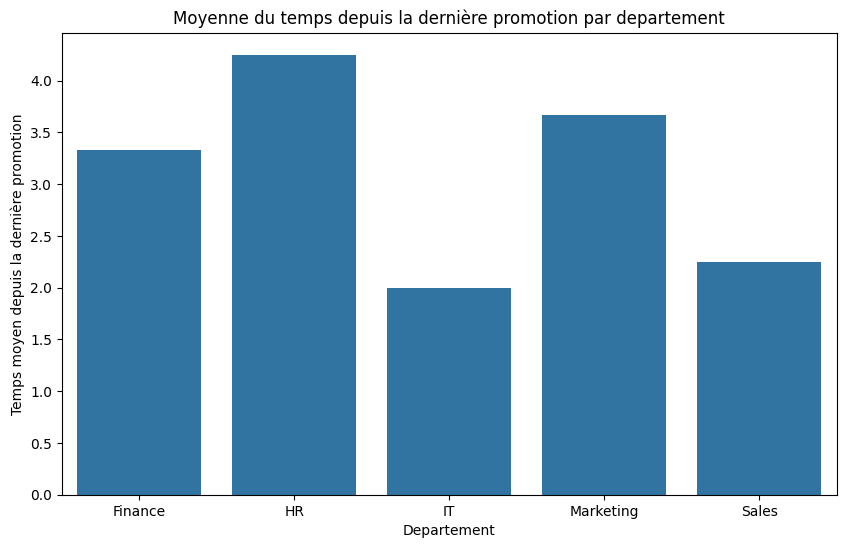

In [64]:
# Graphe
plt.figure(figsize=(10, 6))
sns.barplot(data=tempsPromotion, x='department', y='temps_denye_promotion')
plt.title('Moyenne du temps depuis la dernière promotion par departement')
plt.xlabel('Departement')
plt.ylabel('Temps moyen depuis la dernière promotion')
plt.show()

In [66]:
# salaire en fonction niveau education

salaire_education = data.groupby('education_level')['salary'].mean().reset_index()
print(salaire_education)

  education_level        salary
0        Bachelor  60555.598889
1          Master  62250.099167
2             NaN  55500.060000


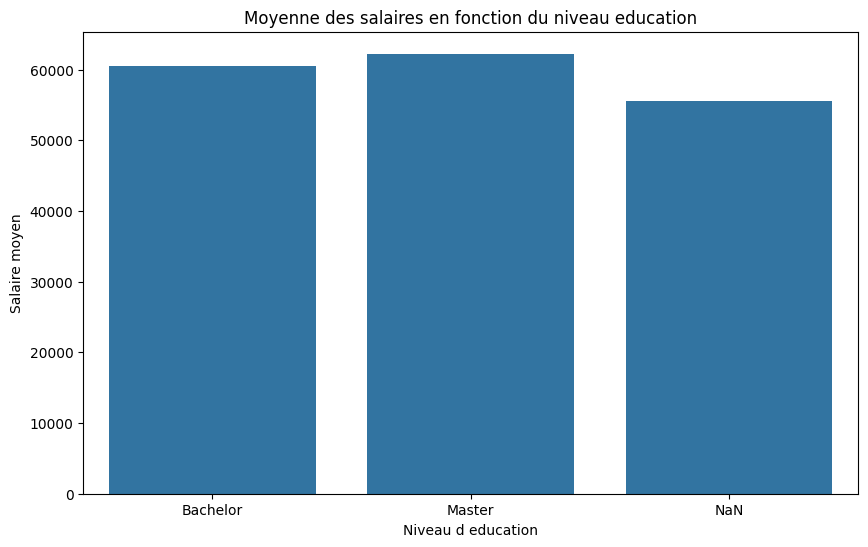

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(data=salaire_education, x='education_level', y='salary')
plt.title('Moyenne des salaires en fonction du niveau education')
plt.xlabel('Niveau d education')
plt.ylabel('Salaire moyen')
plt.show()

In [68]:
# moyenne marie par departement

marie_departement = data.groupby(['department', 'etat_civil']).size().reset_index(name='count')

print(marie_departement)


   department   etat_civil  count
0     Finance  Celibataire      1
1     Finance      Divorce      1
2     Finance        marie      3
3          HR  Celibataire      1
4          HR      Divorce      0
5          HR        marie      4
6          IT  Celibataire      2
7          IT      Divorce      1
8          IT        marie      2
9   Marketing  Celibataire      1
10  Marketing      Divorce      0
11  Marketing        marie      4
12      Sales  Celibataire      0
13      Sales      Divorce      2
14      Sales        marie      3


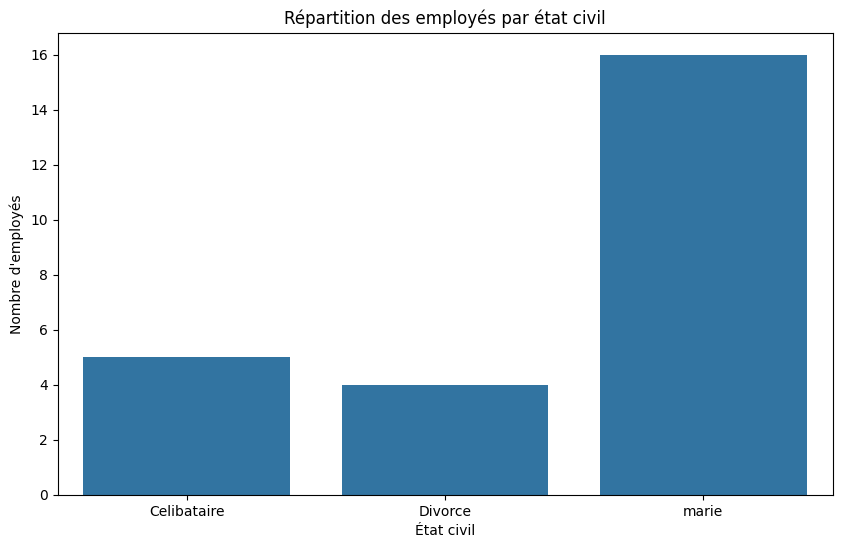

In [69]:
# repartition par etat civil
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='etat_civil')
plt.title('Répartition des employés par état civil')
plt.xlabel('État civil')
plt.ylabel('Nombre d\'employés')
plt.show()

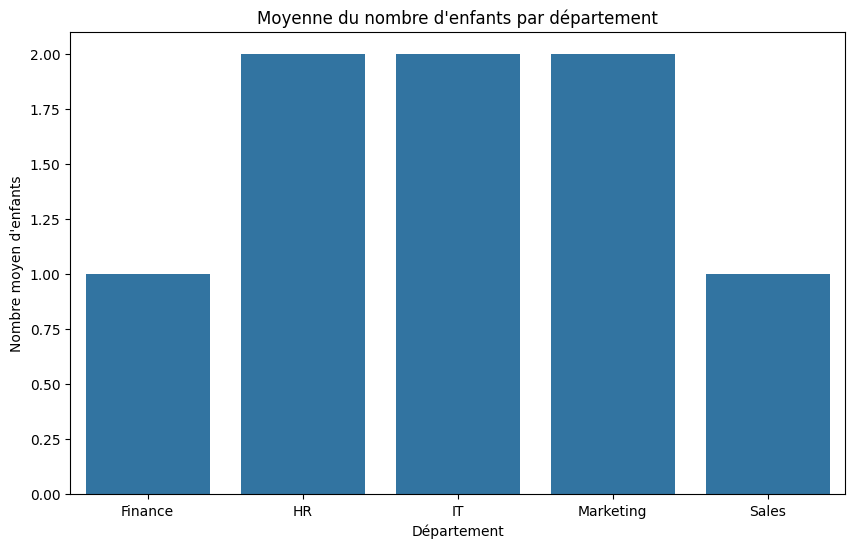

In [70]:
# enfants des employe par departements
enfants_departement = data.groupby('department')['enfants'].mean().reset_index()

enfants_departement['enfants'] = enfants_departement['enfants'].astype(int)


plt.figure(figsize=(10, 6))
sns.barplot(data=enfants_departement, x='department', y='enfants')
plt.title('Moyenne du nombre d\'enfants par département')
plt.xlabel('Département')
plt.ylabel('Nombre moyen d\'enfants')
plt.show()

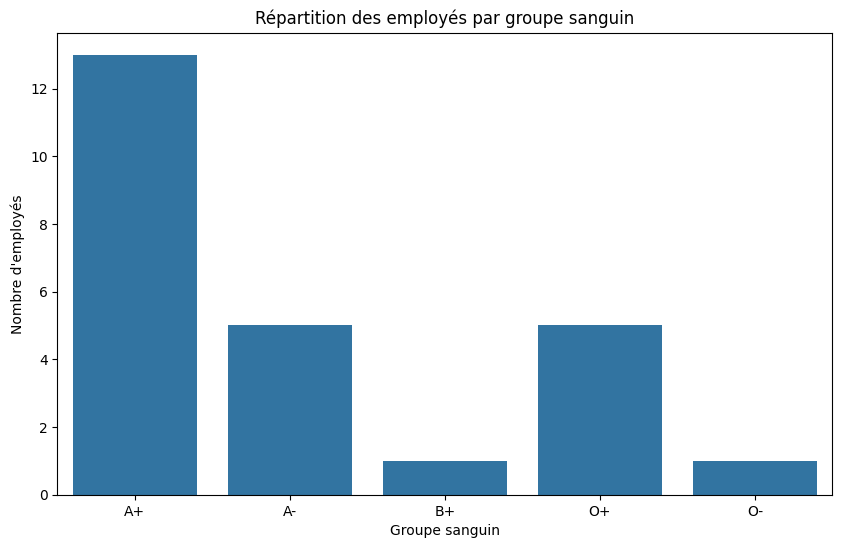

In [71]:
# employe par groupe sanguin
plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='groupe_sanguin')
plt.title('Répartition des employés par groupe sanguin')
plt.xlabel('Groupe sanguin')
plt.ylabel('Nombre d\'employés')
plt.show()

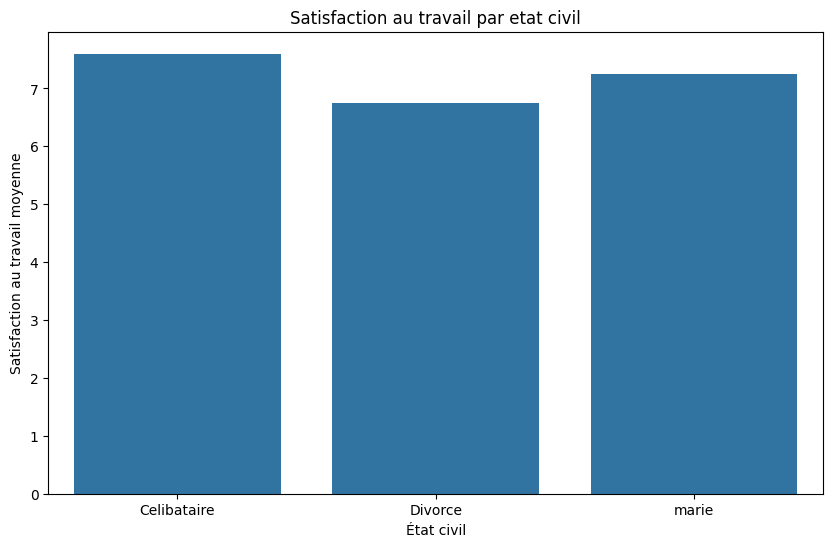

In [72]:
# satisfaction par etat Civil
satisfaction_etat_civil = data.groupby('etat_civil')['job_satisfaction'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=satisfaction_etat_civil, x='etat_civil', y='job_satisfaction')
plt.title('Satisfaction au travail par etat civil')
plt.xlabel('État civil')
plt.ylabel('Satisfaction au travail moyenne')
plt.show()

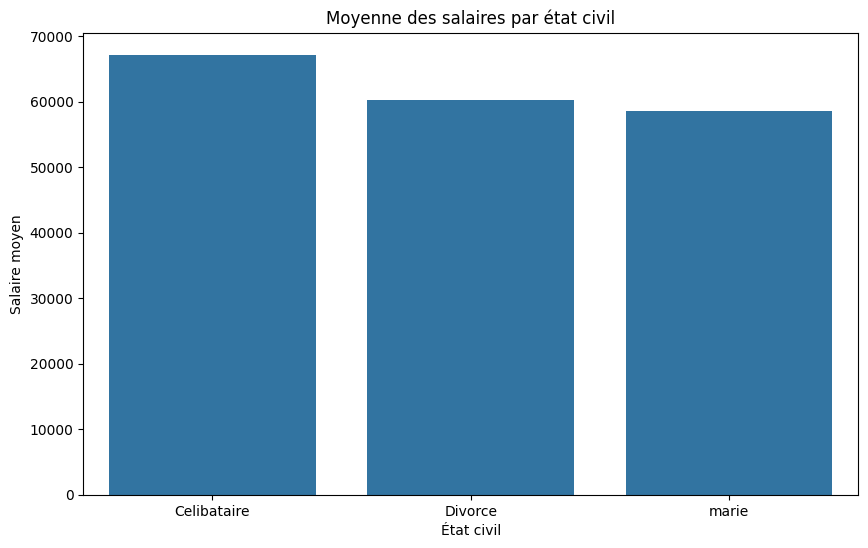

In [73]:
# moyenne Salaire par etat Civil
moyenne_salaire_etat_civil = data.groupby('etat_civil')['salary'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=moyenne_salaire_etat_civil, x='etat_civil', y='salary')
plt.title('Moyenne des salaires par état civil')
plt.xlabel('État civil')
plt.ylabel('Salaire moyen')
plt.show()